# DATA COLLECTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/CovidDataset

/content/drive/My Drive/CovidDataset


In [ ]:
pwd

'/content/drive/My Drive/CovidDataset'

In [ ]:
!ls

covid19.jpeg  Covid_xray_model.h5  Train  Validation


# IMPORTING REQUIREMENTS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image

# MODEL BUILDING

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

# DATA PREPROCESSING

In [ ]:
TRAIN_PATH = "Train"
VAL_PATH = "Validation"

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32
)

validation_data = train_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32
)

Found 360 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_data.class_indices

{'Covid': 0, 'Normal': 1}

# MODEL TRAINING

In [ ]:
history = model.fit(
    train_data,
    epochs=20,
    steps_per_epoch=8,
    validation_data = validation_data,
    validation_steps=2
)

Epoch 1/20
8/8 [==============================] - 11s 1s/step - loss: 0.5572 - accuracy: 0.9181 - val_loss: 0.6179 - val_accuracy: 0.6739
Epoch 2/20
8/8 [==============================] - 12s 1s/step - loss: 0.5700 - accuracy: 0.8516 - val_loss: 0.5617 - val_accuracy: 0.8696
Epoch 3/20
8/8 [==============================] - 11s 1s/step - loss: 0.5619 - accuracy: 0.8594 - val_loss: 0.5763 - val_accuracy: 0.8261
Epoch 4/20
8/8 [==============================] - 11s 1s/step - loss: 0.5366 - accuracy: 0.9023 - val_loss: 0.5581 - val_accuracy: 0.8696
Epoch 5/20
8/8 [==============================] - 11s 1s/step - loss: 0.5439 - accuracy: 0.9258 - val_loss: 0.5466 - val_accuracy: 0.9130
Epoch 6/20
8/8 [==============================] - 11s 1s/step - loss: 0.5620 - accuracy: 0.9310 - val_loss: 0.5546 - val_accuracy: 0.8913
Epoch 7/20
8/8 [==============================] - 11s 1s/step - loss: 0.5159 - accuracy: 0.9258 - val_loss: 0.5437 - val_accuracy: 0.9348
Epoch 8/20
8/8 [==================

# MODEL ACCURARY AND LOSS PLOT

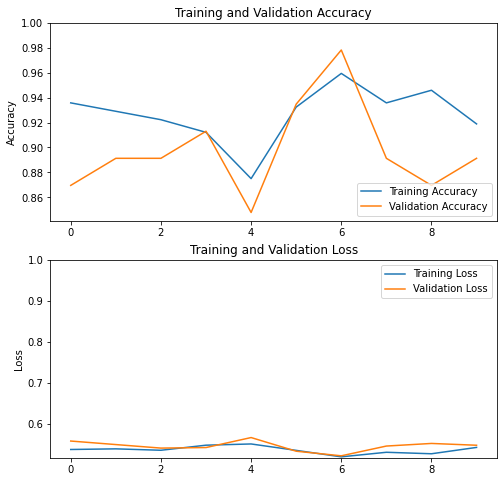

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.ylabel("Accuracy")
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Validation Accuracy")

plt.subplot(2, 1, 2)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.ylabel("Loss")
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Validation Loss")

plt.show()

# SAVING MODEL

In [ ]:
model.save("Covid_xray_model.h5")

# MODEL EVALUATION

In [ ]:
model.evaluate(train_data)

12/12 [==============================] - 11s 944ms/step - loss: 0.5206 - accuracy: 0.9722


[0.5205974578857422, 0.9722222089767456]

In [ ]:
model.evaluate(validation_data)

2/2 [==============================] - 0s 224ms/step - loss: 0.5441 - accuracy: 0.9348


[0.5441340804100037, 0.9347826242446899]

In [ ]:
y_actual = []
y_pred = []

In [ ]:
import os

for i in os.listdir("./Validation/Normal"):
  img = image.load_img("./Validation/Normal/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  pred = model.predict_classes(img)
  y_pred.append(pred[0, 0])
  y_actual.append(1)

for i in os.listdir("./Validation/Covid/"):
  img = image.load_img("./Validation/Covid/"+i, target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  pred = model.predict_classes(img)
  y_pred.append(pred[0, 0])
  y_actual.append(0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

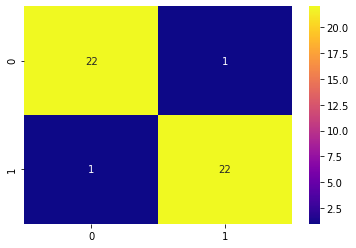

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_actual, y_pred)

import seaborn as sns

sns.heatmap(cm, cmap='plasma', annot=True)

In [ ]:
print(accuracy_score(y_actual, y_pred))

0.9565217391304348


In [ ]:
print(classification_report(y_actual, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.96      0.96      0.96        23

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46



# SAMPLE PREDITCION

In [ ]:
from tensorflow.keras.preprocessing import image

img = image.load_img("covid19.jpeg", target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

pred = model.predict_classes(img)

if pred == 1:
  print("Normal")
elif pred == 0:
  print("Covid")

Covid
